### k-최근접 이웃

In [87]:
import pandas as pd

In [88]:
train = pd.read_csv("../data/basketball_train.csv")
test = pd.read_csv("../data/basketball_test.csv")

In [89]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Sean Kilpatrick,SG,1.5,4.0,0.1
1,Garrett Temple,SG,1.3,2.8,0.4
2,Wayne Ellington,SG,2.4,2.1,0.1
3,Joe Harris,SG,1.6,2.8,0.2
4,Salah Mejri,C,0.0,4.2,0.8


In [90]:
test.head()

,Player,Pos,3P,TRB,BLK
0,Jason Smith,C,0.5,3.5,0.7
1,DeAndre Jordan,C,0.0,13.8,1.7
2,E'Twaun Moore,SG,1.1,2.1,0.4
3,Buddy Hield,SG,1.8,3.3,0.1
4,Roy Hibbert,C,0.0,3.2,1.0


---
### 최적의 K값 찾기(교차 검증 - cross validation)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [92]:
# 최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정

max_k_range = train.shape[0] // 2
max_k_range

40

In [93]:
k_list = [i for i in range(3, max_k_range+1, 2)]
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [94]:
# 점수 저장공간
cross_validation_scores = []

In [95]:
# Feature와 Target

x_train = train[['3P', "BLK", 'TRB']]
y_train = train['Pos']

print(x_train.head())
print("-" * 30)
print(y_train.head())



    3P  BLK  TRB
0  1.5  0.1  4.0
1  1.3  0.4  2.8
2  2.4  0.1  2.1
3  1.6  0.2  2.8
4  0.0  0.8  4.2
------------------------------
0    SG
1    SG
2    SG
3    SG
4     C
Name: Pos, dtype: object


In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
# 교차검증(10-fold)

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train,
        y_train,
        cv = 10,
        scoring = 'accuracy',
    )
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9125,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.8125]

In [98]:
import math

In [99]:
cross_validation_scores = [ 0 if math.isnan(x) else x for x in cross_validation_scores]
cross_validation_scores


[0.9125,
 0.875,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.8125]

In [100]:
import matplotlib.pyplot as plt

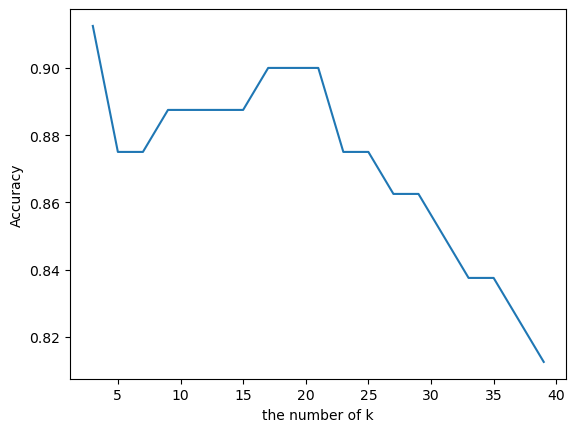

In [101]:
plt.plot(
    k_list,
    cross_validation_scores
)

# plt.ylim((0,1))

plt.xlabel('the number of k')
plt.ylabel('Accuracy')

plt.show()

In [102]:
# 가장 예측율이 높은 k를 선정하자

cvs = cross_validation_scores

k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k : ', k)

The best number of k :  3


---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [59]:
x_train

,3P,BLK,TRB
0,1.5,0.1,4.0
1,1.3,0.4,2.8
2,2.4,0.1,2.1
3,1.6,0.2,2.8
4,0.0,0.8,4.2
...,...,...,...
75,0.0,1.3,6.6
76,0.0,0.6,4.9
77,2.0,0.2,3.3
78,0.5,2.1,7.3


In [71]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]

y_train = train['Pos']

knn.fit(x_train, y_train)

x_test = test[['3P', 'BLK']]
y_test = test['Pos']

pred =knn.predict(x_test)
pred


array(['C', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [74]:
comparision = pd.DataFrame(
    {
        '예측값' : pred,
        '정답' : y_test.values
    }
)

knn.score(x_test,y_test)

0.95

In [66]:
x_train_2 = x_train[['3P', 'BLK']]


# 교차검증(10-fold)
cross_validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train_2,
        y_train,
        cv = 10,
        scoring = 'accuracy',
    )
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.925,
 0.9375,
 0.9375,
 0.95,
 0.9375,
 0.9375,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.925]

In [69]:
# 가장 예측율이 높은 k를 선정하자

cvs = cross_validation_scores

k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k : ', k)
print('The best accuracy :', max(cross_validation_scores))

The best number of k :  11
The best accuracy : 0.95


---
### 학습한 AI모델 사용해보기
- 3P : 3.4
- BLK : 0.5
- TRB : 0.7

In [103]:
knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', "TRB"]]

y_train = train['Pos']

knn.fit(x_train, y_train)

x_test = test[['3P', 'BLK', "TRB"]]
y_test = test['Pos']

pred =knn.predict([[3.4, 0.5, 3.7]])
pred.item()

'SG'

In [104]:
knn.score(x_test, y_test)

0.85

In [83]:
k

39